In [7]:
using Pkg
Pkg.activate("./")
Pkg.instantiate()

  Activating project at `~/UCL/3x2_analytical`


In [8]:
using LinearAlgebra
using ForwardDiff
using Plots
using LimberJack
using CSV
using YAML
using NPZ
using PythonCall
sacc = pyimport("sacc");

# Data

In [9]:
sacc_path = "../../PhD/LimberJack.jl/data/FD/cls_FD_covG.fits"
yaml_path_wlwl = "data/DESY1/wlwl.yml"
sacc_wlwl = sacc.Sacc().load_fits(sacc_path)
yaml_wlwl = YAML.load_file(yaml_path_wlwl)
meta_wlwl, files_wlwl = make_data(sacc_wlwl, yaml_wlwl)

DESwl__0 DESwl__0 24
DESwl__0 DESwl__1 24
DESwl__0 DESwl__2 24
DESwl__0 DESwl__3 24
DESwl__1 DESwl__1 24
DESwl__1 DESwl__2 24
DESwl__1 DESwl__3 24
DESwl__2 DESwl__2 24
DESwl__2 DESwl__3 24
DESwl__3 DESwl__3 24


(LimberJack.Instructions(["DESwl__0", "DESwl__1", "DESwl__2", "DESwl__3"], Any[["DESwl__0", "DESwl__0"], ["DESwl__0", "DESwl__1"], ["DESwl__0", "DESwl__2"], ["DESwl__0", "DESwl__3"], ["DESwl__1", "DESwl__1"], ["DESwl__1", "DESwl__2"], ["DESwl__1", "DESwl__3"], ["DESwl__2", "DESwl__2"], ["DESwl__2", "DESwl__3"], ["DESwl__3", "DESwl__3"]], ["galaxy_shear", "galaxy_shear", "galaxy_shear", "galaxy_shear"], [0, 24, 48, 72, 96, 120, 144, 168, 192, 216, 240], [2.4659965589802277e-9, 1.937338987992683e-9, 6.992765360481148e-10, -4.9611713239579213e-11, 7.913395793306234e-10, 2.025477514463439e-10, 2.937251108461027e-10, 2.5800941836058233e-10, 3.588061352802992e-10, 6.231168353367879e-10  …  4.737458899576856e-10, 8.27594560926968e-10, 5.318332277673948e-10, 3.860067333751191e-10, 4.674884118894536e-10, 3.737344096265107e-10, 8.676072775051082e-11, 2.8609099937088954e-10, 2.0381853638647756e-10, 1.2493271614464064e-10], [1.4706926451000433e-18 -9.21447582866358e-20 … -8.136848663034692e-24 -7.

In [10]:
sacc_path = "../../PhD/LimberJack.jl/data/FD/cls_FD_covG.fits"
yaml_path_gcgc = "data/DESY1/gcgc.yml"
sacc_gcgc = sacc.Sacc().load_fits(sacc_path)
yaml_gcgc = YAML.load_file(yaml_path_gcgc)
meta_gcgc, files_gcgc = make_data(sacc_gcgc, yaml_gcgc)

DESgc__0 DESgc__0 5
DESgc__1 DESgc__1 8
DESgc__2 DESgc__2 10
DESgc__3 DESgc__3 11
DESgc__4 DESgc__4 13


(LimberJack.Instructions(["DESgc__0", "DESgc__1", "DESgc__2", "DESgc__3", "DESgc__4"], Any[["DESgc__0", "DESgc__0"], ["DESgc__1", "DESgc__1"], ["DESgc__2", "DESgc__2"], ["DESgc__3", "DESgc__3"], ["DESgc__4", "DESgc__4"]], ["galaxy_density", "galaxy_density", "galaxy_density", "galaxy_density", "galaxy_density"], [0, 5, 13, 23, 34, 47], [0.00019024248750512107, 7.391276663994371e-5, 4.261252890607883e-5, 2.22965965139283e-5, 2.176880112868429e-5, 8.240734039668606e-5, 8.421314587773898e-5, 2.6585137640401017e-5, 2.6033426315289483e-5, 1.6202481595102046e-5  …  1.720793463317388e-5, 1.876041365219758e-5, 1.1858834397319835e-5, 6.023987322753388e-6, 3.4894299563905405e-6, 7.420152296134288e-6, 4.729410691534381e-6, 4.317808418665961e-6, 4.736098712055406e-6, 2.545509196409628e-6], [3.503459378925734e-9 -2.6907237994012596e-10 … -1.8766243449428733e-32 -1.9859652134651026e-32; -2.6907237994012596e-10 2.4651642374142706e-10 … -4.810041560235908e-31 -4.501051455667023e-31; … ; -1.87662434494

In [11]:
sacc_path = "../../PhD/LimberJack.jl/data/FD/cls_FD_covG.fits"
yaml_path_3x2 = "data/DESY1/gcgc_gcwl_wlwl.yml"
sacc_3x2 = sacc.Sacc().load_fits(sacc_path)
yaml_3x2 = YAML.load_file(yaml_path_3x2) 
meta_3x2, files_3x2 = make_data(sacc_3x2, yaml_3x2)

DESgc__0 DESgc__0 5
DESgc__1 DESgc__1 8
DESgc__2 DESgc__2 10
DESgc__3 DESgc__3 11
DESgc__4 DESgc__4 13
DESgc__0 DESwl__0 5
DESgc__0 DESwl__1 5
DESgc__0 DESwl__2 5
DESgc__0 DESwl__3 5
DESgc__1 DESwl__0 8
DESgc__1 DESwl__1 8
DESgc__1 DESwl__2 8
DESgc__1 DESwl__3 8
DESgc__2 DESwl__0 10
DESgc__2 DESwl__1 10
DESgc__2 DESwl__2 10
DESgc__2 DESwl__3 10
DESgc__3 DESwl__0 11
DESgc__3 DESwl__1 11
DESgc__3 DESwl__2 11
DESgc__3 DESwl__3 11
DESgc__4 DESwl__0 13
DESgc__4 DESwl__1 13
DESgc__4 DESwl__2 13
DESgc__4 DESwl__3 13
DESwl__0 DESwl__0 24
DESwl__0 DESwl__1 24
DESwl__0 DESwl__2 24
DESwl__0 DESwl__3 24
DESwl__1 DESwl__1 24
DESwl__1 DESwl__2 24
DESwl__1 DESwl__3 24
DESwl__2 DESwl__2 24
DESwl__2 DESwl__3 24
DESwl__3 DESwl__3 24


(LimberJack.Instructions(["DESgc__0", "DESgc__1", "DESgc__2", "DESgc__3", "DESgc__4", "DESwl__0", "DESwl__1", "DESwl__2", "DESwl__3"], Any[["DESgc__0", "DESgc__0"], ["DESgc__1", "DESgc__1"], ["DESgc__2", "DESgc__2"], ["DESgc__3", "DESgc__3"], ["DESgc__4", "DESgc__4"], ["DESgc__0", "DESwl__0"], ["DESgc__0", "DESwl__1"], ["DESgc__0", "DESwl__2"], ["DESgc__0", "DESwl__3"], ["DESgc__1", "DESwl__0"]  …  ["DESwl__0", "DESwl__0"], ["DESwl__0", "DESwl__1"], ["DESwl__0", "DESwl__2"], ["DESwl__0", "DESwl__3"], ["DESwl__1", "DESwl__1"], ["DESwl__1", "DESwl__2"], ["DESwl__1", "DESwl__3"], ["DESwl__2", "DESwl__2"], ["DESwl__2", "DESwl__3"], ["DESwl__3", "DESwl__3"]], ["galaxy_density", "galaxy_density", "galaxy_density", "galaxy_density", "galaxy_density", "galaxy_shear", "galaxy_shear", "galaxy_shear", "galaxy_shear"], [0, 5, 13, 23, 34, 47, 52, 57, 62, 67  …  259, 283, 307, 331, 355, 379, 403, 427, 451, 475], [0.00019024248750512107, 7.391276663994371e-5, 4.261252890607883e-5, 2.22965965139283e-5

# Make Nzs

In [12]:
using Distributions, Random, Interpolations, LinearAlgebra

In [13]:
DESgc__0_dz = Normal(0.0, 0.007)
DESgc__1_dz = Normal(0.0, 0.007)
DESgc__2_dz = Normal(0.0, 0.006)
DESgc__3_dz = Normal(0.0, 0.01)
DESgc__4_dz = Normal(0.0, 0.01)
DESwl__0_dz = Normal(-0.001, 0.016)
DESwl__1_dz = Normal(-0.019, 0.013)
DESwl__2_dz = Normal(0.009, 0.011)
DESwl__3_dz = Normal(-0.018, 0.022)

Normal{Float64}(μ=-0.018, σ=0.022)

In [14]:
function make_nzs(zs_0, nzs_0, dist; samples=1000)
    nzs = zeros(length(zs_0), samples)
    for i in 1:samples
        shift = rand(dist)
        zs = zs_0 .+ shift
        nz_i = LinearInterpolation(zs, nzs_0; extrapolation_bc=Line())
        nzs[:, i] = nz_i(zs_0)
    end        
    return nzs
end

nzs_DESwl__0 = make_nzs(files_wlwl["nz_DESwl__0"][1], files_wlwl["nz_DESwl__0"][2], DESwl__0_dz)
nzs_DESwl__1 = make_nzs(files_wlwl["nz_DESwl__1"][1], files_wlwl["nz_DESwl__1"][2], DESwl__1_dz)
nzs_DESwl__2 = make_nzs(files_wlwl["nz_DESwl__2"][1], files_wlwl["nz_DESwl__2"][2], DESwl__2_dz)
nzs_DESwl__3 = make_nzs(files_wlwl["nz_DESwl__3"][1], files_wlwl["nz_DESwl__3"][2], DESwl__3_dz);

nzs_DESgc__0 = make_nzs(files_gcgc["nz_DESgc__0"][1], files_gcgc["nz_DESgc__0"][2], DESgc__0_dz)
nzs_DESgc__1 = make_nzs(files_gcgc["nz_DESgc__1"][1], files_gcgc["nz_DESgc__1"][2], DESgc__1_dz)
nzs_DESgc__2 = make_nzs(files_gcgc["nz_DESgc__2"][1], files_gcgc["nz_DESgc__2"][2], DESgc__2_dz)
nzs_DESgc__3 = make_nzs(files_gcgc["nz_DESgc__3"][1], files_gcgc["nz_DESgc__3"][2], DESgc__3_dz)
nzs_DESgc__4 = make_nzs(files_gcgc["nz_DESgc__4"][1], files_gcgc["nz_DESgc__4"][2], DESgc__4_dz);

In [15]:
nz_DESgc__0_m = mean(nzs_DESgc__0; dims=2)
nz_DESgc__0_cov = cov(nzs_DESgc__0; dims=2);

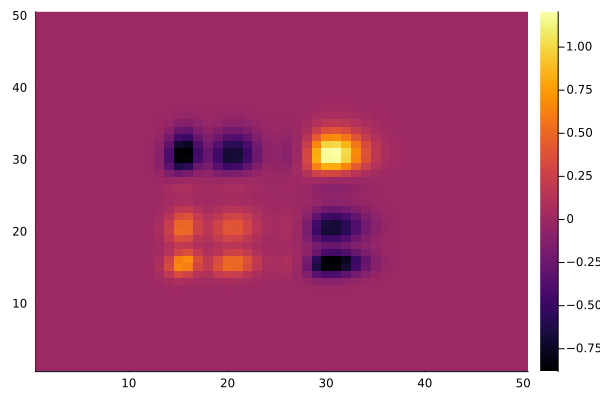

In [28]:
heatmap(nz_DESgc__0_cov[1:50, 1:50])

In [23]:
sqrt.(diag(nz_DESgc__0_cov))

400-element Vector{Float64}:
 0.0
 0.0
 0.0
 0.0
 0.0
 0.0
 0.0
 0.0
 2.946244855919735e-5
 0.0004261825943103276
 0.0043174053745249135
 0.029700049373177335
 0.13887126775718872
 ⋮
 0.0
 0.0
 0.0
 0.0
 0.0
 0.0
 0.0
 0.0
 0.0
 0.0
 0.0
 0.0

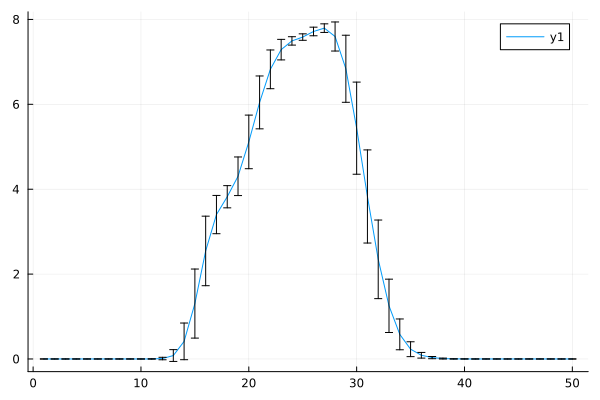

In [29]:
plot(nz_DESgc__0_m[1:50], yerr=sqrt.(diag(nz_DESgc__0_cov))[1:50])

In [19]:
function make_Cmod(dz_cov, data_cov, model; mode="AD")
    m = size(dz_cov)[1]
    n_cls = size(data_cov)[1]
    T = zeros(n_cls, m)

    if mode == "AD"
        println("Using automatic differentiation to compute T")
        null = zeros(m)
        T = ForwardDiff.jacobian(model, null)
    elseif mode == "FD"
        println("Using finite differences to compute T")
        d = 0.05
        for i in 1:m
            null = zeros(m)
            e = zeros(m)
            e[i] = d
            T[:, i] = (model(null.+e) .- model(null.-e)) ./ (2*d)
        end
    end
    TPT = T * dz_cov * T'
    Cmod = Symmetric(data_cov + TPT)
    return Cmod
end

make_Cmod (generic function with 1 method)

## WLWL

In [20]:
function make_nzs(zs_0, nzs_0, dist; samples=1000)
    nzs = zeros(length(zs_0), samples)
    for i in 1:samples
        shift = rand(dist)
        zs = zs_0 .+ shift
        nz_i = LinearInterpolation(zs, nzs_0; extrapolation_bc=Line())
        nzs[:, i] = nz_i(zs_0)
    end        
    return nzs
end

nzs_DESwl__0 = make_nzs(files_wlwl["nz_DESwl__0"][1], files_wlwl["nz_DESwl__0"][2], DESwl__0_dz)
nzs_DESwl__1 = make_nzs(files_wlwl["nz_DESwl__1"][1], files_wlwl["nz_DESwl__1"][2], DESwl__1_dz)
nzs_DESwl__2 = make_nzs(files_wlwl["nz_DESwl__2"][1], files_wlwl["nz_DESwl__2"][2], DESwl__2_dz)
nzs_DESwl__3 = make_nzs(files_wlwl["nz_DESwl__3"][1], files_wlwl["nz_DESwl__3"][2], DESwl__3_dz);

nzs_DESgc__0 = make_nzs(files_gcgc["nz_DESgc__0"][1], files_gcgc["nz_DESgc__0"][2], DESgc__0_dz)
nzs_DESgc__1 = make_nzs(files_gcgc["nz_DESgc__1"][1], files_gcgc["nz_DESgc__1"][2], DESgc__1_dz)
nzs_DESgc__2 = make_nzs(files_gcgc["nz_DESgc__2"][1], files_gcgc["nz_DESgc__2"][2], DESgc__2_dz)
nzs_DESgc__3 = make_nzs(files_gcgc["nz_DESgc__3"][1], files_gcgc["nz_DESgc__3"][2], DESgc__3_dz)
nzs_DESgc__4 = make_nzs(files_gcgc["nz_DESgc__4"][1], files_gcgc["nz_DESgc__4"][2], DESgc__4_dz);

In [21]:
function model_wlwl(x; meta=meta_wlwl, files=files_wlwl)
    cosmo = Cosmology(Ωm=0.3, Ωb=0.05, h=0.67, σ8=0.81, ns=0.96,
    tk_mode=:EisHu, pk_mode=:Halofit)
    nuisances = Dict(
        "DESgc__0_b" => 1.484,
        "DESgc__1_b" => 1.805,
        "DESgc__2_b" => 1.776,
        "DESgc__3_b" => 2.168,
        "DESgc__4_b" => 2.23,
        "DESwl__0_dz" => x[1],
        "DESwl__1_dz" => x[2],
        "DESwl__2_dz" => x[3],
        "DESwl__3_dz" => x[4],
        "DESwl__0_m" => 0.018,
        "DESwl__1_m" => 0.014,
        "DESwl__2_m" => 0.01,
        "DESwl__3_m" => 0.004,
        "A_IA" => 0.294,
        "alpha_IA" => 0.378)
    cosmo.settings.cosmo_type = eltype(valtype(x))
    return Theory(cosmo, meta, files; Nuisances=nuisances)
end;

In [22]:
Cmod_wlwl_FD = make_Cmod(dz_cov_wlwl, meta_wlwl.cov, model_wlwl; mode="FD")
Cmod_wlwl_AD = make_Cmod(dz_cov_wlwl, meta_wlwl.cov, model_wlwl; mode="AD")

LoadError: UndefVarError: `dz_cov_wlwl` not defined

In [ ]:
plot(abs.(diag(meta_wlwl.cov) .- diag(Cmod_wlwl_AD)) ./ diag(meta_wlwl.cov), label="AD", title="WLWL")
plot!(abs.(diag(meta_wlwl.cov) .- diag(Cmod_wlwl_FD)) ./ diag(meta_wlwl.cov), label="FD", title="WLWL")

In [ ]:
heatmap(log.(abs.((Cmod_wlwl_AD .- meta_wlwl.cov)./ meta_wlwl.cov)), title="TPT wlwl", yflip=true)

In [ ]:
npzwrite("covs/dz_wlwl_covs.npz",
        Dict(
        "wlwl_AD" => Cmod_wlwl_AD,
        "wlwl_FD" => Cmod_wlwl_FD))

## GCGC

In [ ]:
function model_gcgc(x; meta=meta_gcgc, files=files_gcgc)
    cosmo = Cosmology(Ωm=0.3, Ωb=0.05, f=0.67, σ8=0.81, ns=0.96,
    tk_mode=:EisHu, pk_mode=:Halofit)
    nuisances = Dict(
        "DESgc__0_b" => 1.484,
        "DESgc__1_b" => 1.805,
        "DESgc__2_b" => 1.776,
        "DESgc__3_b" => 2.168,
        "DESgc__4_b" => 2.23,
        "DESgc__0_dz" => x[1],
        "DESgc__1_dz" => x[2],
        "DESgc__2_dz" => x[3],
        "DESgc__3_dz" => x[4],
        "DESgc__4_dz" => x[5],
        "DESwl__0_m" => 0.018,
        "DESwl__1_m" => 0.014,
        "DESwl__2_m" => 0.01,
        "DESwl__3_m" => 0.004,
        "A_IA" => 0.294,
        "alpha_IA" => 0.378)
    cosmo.settings.cosmo_type = eltype(valtype(x))
    return Theory(cosmo, meta, files; Nuisances=nuisances)
end;

In [ ]:
Cmod_gcgc_FD = make_Cmod(dz_cov_gcgc, meta_gcgc.cov, model_gcgc; mode="FD")
Cmod_gcgc_AD = make_Cmod(dz_cov_gcgc, meta_gcgc.cov, model_gcgc; mode="AD")

In [ ]:
plot(abs.(diag(meta_gcgc.cov) .- diag(Cmod_gcgc_AD)) ./ diag(meta_gcgc.cov), label="AD", title="GCGC")
plot!(abs.(diag(meta_gcgc.cov) .- diag(Cmod_gcgc_FD)) ./ diag(meta_gcgc.cov), label="FD")

In [ ]:
heatmap(log.(abs.((Cmod_gcgc_AD .- meta_gcgc.cov)./ meta_gcgc.cov)), title="TPT gcgc", yflip=true)

In [ ]:
npzwrite("covs/dz_wlwl_covs.npz",
        Dict(
        "gcgc_AD" => Cmod_gcgc_AD,
        "gcgc_FD" => Cmod_gcgc_FD))

## 3x2

In [ ]:
function model_3x2(x; meta=meta_3x2, files=files_3x2)
    cosmo = Cosmology(Ωm=0.3, Ωb=0.05, h=0.67, σ8=0.81, ns=0.96,
    tk_mode=:EisHu, pk_mode=:Halofit)
    nuisances = Dict(
        "DESgc__0_b" => 1.484,
        "DESgc__1_b" => 1.805,
        "DESgc__2_b" => 1.776,
        "DESgc__3_b" => 2.168,
        "DESgc__4_b" => 2.23,
        "DESwl__0_dz" => x[1],
        "DESwl__1_dz" => x[2],
        "DESwl__2_dz" => x[3],
        "DESwl__3_dz" => x[4],
        "DESgc__0_dz" => x[5],
        "DESgc__1_dz" => x[6],
        "DESgc__2_dz" => x[7],
        "DESgc__3_dz" => x[8],
        "DESgc__4_dz" => x[9],
        "DESwl__0_m" => 0.018,
        "DESwl__1_m" => 0.014,
        "DESwl__2_m" => 0.01,
        "DESwl__3_m" => 0.004,
        "A_IA" => 0.294,
        "alpha_IA" => 0.378) 
    cosmo.settings.cosmo_type = eltype(valtype(x))
    return Theory(cosmo, meta, files; Nuisances=nuisances)
end;

In [ ]:
Cmod_3x2_FD = make_Cmod(dz_cov_3x2, meta_3x2.cov, model_3x2; mode="FD");
Cmod_3x2_AD = make_Cmod(dz_cov_3x2, meta_3x2.cov, model_3x2; mode="AD");

In [ ]:
plot(abs.(diag(meta_3x2.cov) .- diag(Cmod_3x2_FD)) ./ diag(meta_3x2.cov), label="FD", title="3x2")
plot!(abs.(diag(meta_3x2.cov) .- diag(Cmod_3x2_AD)) ./ diag(meta_3x2.cov), label="AD")

In [ ]:
heatmap(log.(abs.((Cmod_3x2_AD .- meta_3x2.cov)./ meta_3x2.cov)), title="TPT 3x2", yflip=true)

In [ ]:
npzwrite("covs/dz_covs.npz",
        Dict(
        "3x2_AD" => Cmod_3x2_AD,
        "3x2_FD" => Cmod_3x2_FD))

## Save

In [ ]:
using NPZ
npzwrite("covs/dz_covs.npz",
        Dict(
        "wlwl_AD" => Cmod_wlwl_AD,
        "wlwl_FD" => Cmod_wlwl_FD,
        "gcgc_AD" => Cmod_gcgc_AD,
        "gcgc_FD" => Cmod_gcgc_FD,
        "3x2_AD" => Cmod_3x2_AD,
        "3x2_FD" => Cmod_3x2_FD))